# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Altcoin Season By Mid November? Analyst Maps Month End Targets For Top Cryptos.  The post Altcoin Season By Mid November? Analyst Maps Month End Targets For Top Cryptos appeared first on Coinpedia Fintech NewsThe global crypto market capitalization&#8217;s turmoil near the $1 trillion mark has plummeted the crypto portfolios of investors and now continues to pressurize traders amid the crypto winter. Despite undergoing several jolts, including CPI data and US stock market correlation, the prolonged crypto winter now seems to bring smiles to crypto users as the market &#8230; ... [| Skaityti daugiau](https://coinpedia.org/altcoin/altcoin-season-by-mid-november-analyst-maps-month-end-targets-for-top-cryptos/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Apple Warns iPhone Production Disrupted by China Covid-19 Restrictions.  The company's high-end iPhone 14 Pro and Pro Max models are being affected by reduced production capacity ... [| Skaityti daugiau](https://www.wsj.com/articles/apple-warns-iphone-production-being-disrupted-by-china-covid-19-restrictions-11667776529?mod=hp_lead_pos6) 

### Kainų kaita pandemijos metu

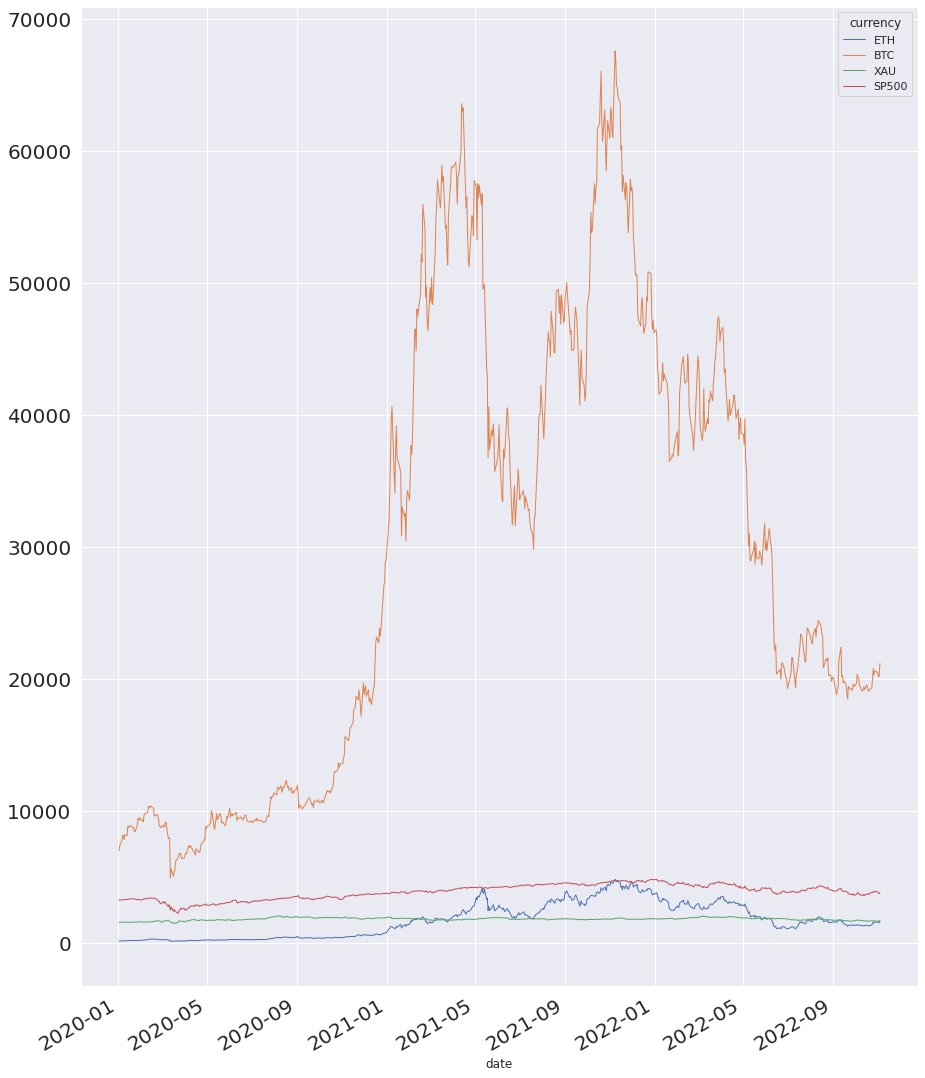

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.897098,0.254209,0.914341
BTC,0.897098,1.000000,0.238701,0.842760
XAU,0.254209,0.238701,1.000000,0.356901
SP500,0.914341,0.842760,0.356901,1.000000


In [8]:
#hide ### Koreliacijos matrica.

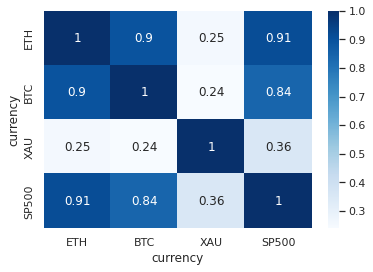

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')